# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True


## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [6]:
# удалим пропуски
data.dropna(inplace = True)
# поверим наличие пропусков
data.CustomerID.isnull().sum()

0

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [7]:
# проверим, есть ли в данных дубликаты
data.duplicated().value_counts()

False    401604
True       5225
Name: count, dtype: int64

In [8]:
# удалиим дубликаты
data=data.drop_duplicates()
# проверим наличие дублей
data.duplicated().value_counts()

False    401604
Name: count, dtype: int64

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [14]:
negative_quantity = data[(data['Quantity']<0)]

In [15]:
negative_quantity['InvoiceNo'].apply(lambda x: 'C' not in x).sum()

0

In [9]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [10]:
#добавим признак отмены (1- отменен, 0-нет)
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: int('C' in x))
p = len(nb_products_per_basket[nb_products_per_basket['order_canceled']==1])/len(nb_products_per_basket)*100
print('процент отмененных заказов', round((p),2))

процент отмененных заказов 16.47


In [11]:
# посмотрим на отмененные заказы
nb_products_per_basket[nb_products_per_basket['order_canceled']==1].head()

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


In [12]:
data[data['CustomerID'] == '12346'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


Проверим, для каждой отменённой транзакцию в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара.

In [16]:
for index, col in negative_quantity.iterrows():
  if data[(data['CustomerID'] == col['CustomerID']) & (data['Quantity'] == -col['Quantity'])
      & (data['StockCode'] == col['StockCode'])].shape[0]==0:
    print(col)
    print('Our initial hypothesis is wrong')
    break

InvoiceNo                  C536379
StockCode                        D
Description               Discount
Quantity                        -1
InvoiceDate    2010-12-01 09:41:00
UnitPrice                     27.5
CustomerID                   14527
Country             United Kingdom
Name: 141, dtype: object
Our initial hypothesis is wrong


In [17]:
data[data['CustomerID'] == '14527'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


Проверим, для каждой ли отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки.

In [18]:
data_check = negative_quantity[negative_quantity['StockCode'] != 'D']

for index, col in data_check.iterrows():
  if data[(data['CustomerID'] == col['CustomerID']) & (data['Quantity'] == -col['Quantity'])
        & (data['Description'] == col['Description'])].shape[0] == 0:
    print(col)
    print('The second hypothesis is also wrong')
    break

InvoiceNo                              C536383
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
Quantity                                    -1
InvoiceDate                2010-12-01 09:49:00
UnitPrice                                 4.65
CustomerID                               15311
Country                         United Kingdom
Name: 154, dtype: object
The second hypothesis is also wrong


In [19]:
data[(data['CustomerID'] == '15311') & (data['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


In [20]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

In [21]:
# количество пропусков
data.QuantityCanceled.isnull().sum()

1303

In [22]:
# удалим пропуски
data.dropna(inplace = True)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [23]:
# удалим транзакции с отрицательным количеством товара
data = data[data['Quantity'] > 0]

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [24]:
# создадим новый признак с кодами из признака 'StockCode'
data['StockCod'] = data.StockCode.str.extract(r'(^[a-zA-Z]+)')
# посмотрим на значения столбца 'StockCod'
data['StockCod'].value_counts()

StockCod
POST    1099
M        285
C        133
DOT       16
BANK      12
PADS       4
Name: count, dtype: int64

In [25]:
# отфильтруем по пустым значениям признака StockCod
data = data[data['StockCod'].isna()]
# удалим вспомогательный признак StockCod
data = data.drop(['StockCod'], axis=1)

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [26]:
# отфильтруем нулевые цены товара
data = data.loc[data['UnitPrice'] != 0]

In [27]:
data.shape

(391150, 9)

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [28]:
# создадим признак с общей ценой
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


#### 2.1.7. Признаки даты

In [29]:
# создадим функцию для перобразования даты
def add_datetime_features(data):
    data["date"] = data['InvoiceDate'].dt.date
    data["hour"] = data['InvoiceDate'].dt.hour
    data["day_of_week"] = data['InvoiceDate'].dt.day_name()
    return data

# применим функцию
data = add_datetime_features(data)

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



#### 2.2.1 Графики стран и покупателей

In [30]:
# сгруппируем данные по стране и посчитаем количество покупателей
data_country_customers = data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
# отобразим первые значения
data_country_customers.head()

Country
United Kingdom    3916
Germany             94
France              87
Spain               30
Belgium             25
Name: CustomerID, dtype: int64

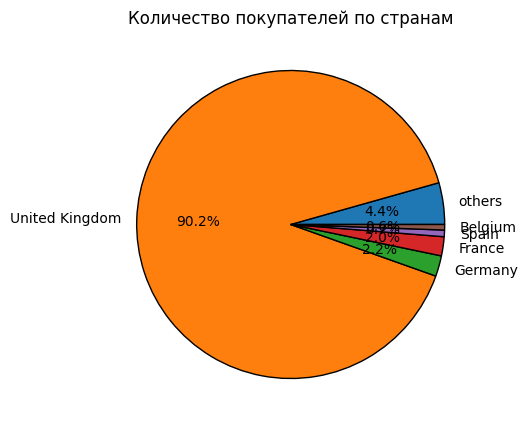

In [31]:
# создадим датафрейм для графика
data_country_customers_df = data_country_customers.reset_index().rename({'index': 'country',
                                                                      'CustomerID': 'value'},
                                                                      axis='columns')
# создадим топ 5 значений
top_5 = data_country_customers_df[:5]

# создадим остальные значений в отдельную переменную
sum_others = pd.DataFrame(data = {
    'Country' : ['others'],
    'value' : [data_country_customers_df.value[5:].sum()]
})

# комбинируем топ  и остальные значения в один df
df2 = pd.concat([sum_others, top_5])

# создадим pie chart
fig, ax = plt.subplots(figsize=(8,5))
plt.pie(df2['value'], labels=df2['Country'], autopct='%0.1f%%')
plt.title('Количество покупателей по странам')
plt.show()

In [32]:
# сгруппируем данные по стране и посчитаем количество транзакций
data_country_InvoiceNo = data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
# отобразим первые значения
data_country_InvoiceNo.head()

Country
United Kingdom    16579
Germany             443
France              379
EIRE                256
Belgium              98
Name: InvoiceNo, dtype: int64

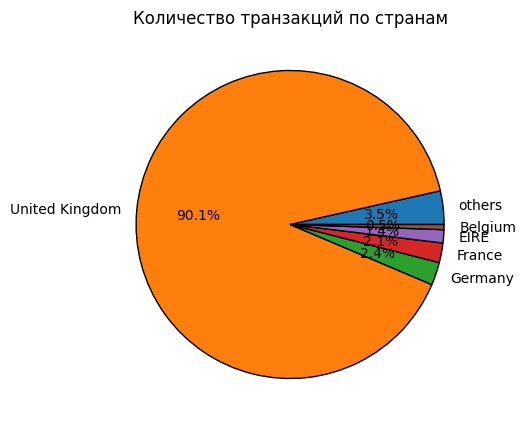

In [33]:
# создадим датафрейм для графика
data_country_InvoiceNo_df = data_country_InvoiceNo.reset_index().rename({'index': 'country',
                                                                      'InvoiceNo': 'value'},
                                                                      axis='columns')
# создадим топ 5 значений
top_5 = data_country_InvoiceNo_df[:5]

# создадим остальные значений в отдельную переменную
sum_others = pd.DataFrame(data = {
    'Country' : ['others'],
    'value' : [data_country_InvoiceNo_df.value[5:].sum()]
})

#комбинируем топ  и остальные значения в один df
df3 = pd.concat([sum_others, top_5])

# создадим pie chart
fig, ax = plt.subplots(figsize=(8,5))
plt.pie(df3['value'], labels=df3['Country'], autopct='%0.1f%%')
plt.title('Количество транзакций по странам')
plt.show()

In [34]:
# сгруппируем данные по стране и посчитаем сумму покупок
data_country_Sum = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
# отобразим первые значения
data_country_Sum.head()

Country
United Kingdom    6797691.44
Netherlands        283443.54
EIRE               247074.57
Germany            201520.71
France             181529.63
Name: TotalPrice, dtype: float64

#### 2.2.2 Графики времени и дат

Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

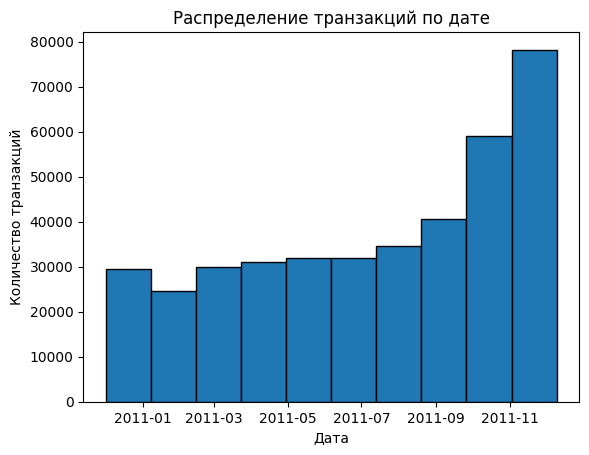

In [35]:
# обозначим данные для построения графика
plt.hist(data['InvoiceDate'])

# добавим названия графика и осей
plt.title('Распределение транзакций по дате')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')

# Отобразим график
plt.show()

In [36]:
# покажем распределение количества транзакций по дням недели
print('Покупки по дням недели ')
print(data.groupby("day_of_week")["InvoiceNo"].count().
    reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))
print('Среднее количество покупок в день {:.1f}'.
    format(round(data["date"].value_counts().mean())))

Покупки по дням недели 
day_of_week
Monday       63963.0
Tuesday      65491.0
Wednesday    67769.0
Thursday     78904.0
Friday       53939.0
Saturday         NaN
Sunday       61084.0
Name: InvoiceNo, dtype: float64
Среднее количество покупок в день 1282.0


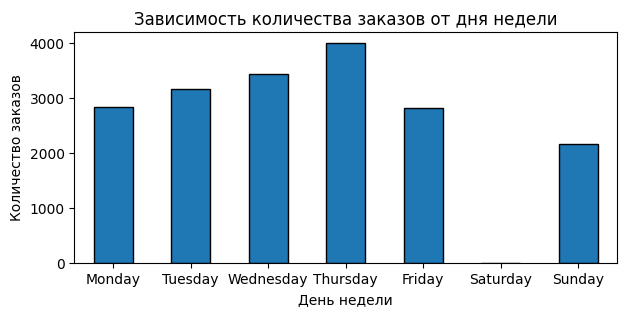

In [37]:
# покажем распределение количества заказов по дням недели на графике
plt.figure(figsize=(7,3))
data.groupby('day_of_week')['InvoiceNo'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ]).plot(kind="bar",  rot=0)
plt.title("Зависимость количества заказов от дня недели")
plt.xlabel("День недели")
plt.ylabel("Количество заказов")
plt.show()

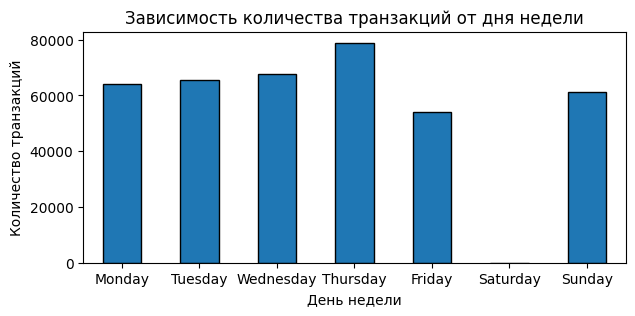

In [38]:
# график распределения количества транзакций в зависимости от дня недели
plt.figure(figsize=(7,3))
data.groupby("day_of_week")["InvoiceNo"].count().reindex(
  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
  ]).plot(kind="bar", rot=0)
plt.title("Зависимость количества транзакций от дня недели")
plt.xlabel("День недели")
plt.ylabel("Количество транзакций")
plt.show()

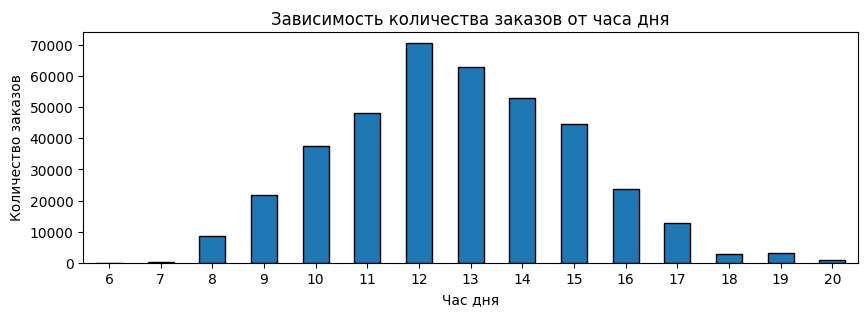

In [39]:
# график распределения количества заказов в зависимости от часа дня
plt.figure(figsize=(10,3))
data.groupby("hour")["InvoiceNo"].count().plot(kind="bar", rot=0)
plt.title("Зависимость количества заказов от часа дня")
plt.xlabel("Час дня")
plt.ylabel("Количество заказов")
plt.show()

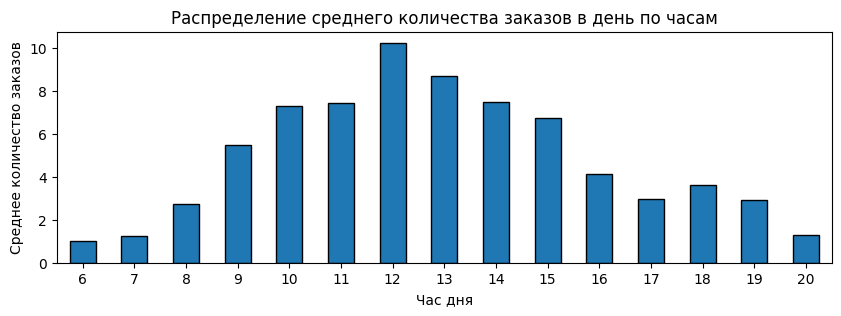

In [40]:
# сгруппируем по дате и часам данные по уникальным заказам
mean_per_hour = data.groupby(["date","hour"])["InvoiceNo"].nunique()

plt.figure(figsize=(10,3))
# сгруппируем по часам, вычислив среднее количество заказов в день
mean_per_hour.groupby("hour").mean().plot(kind="bar",  rot=0)
plt.xlabel('Час дня')
plt.ylabel('Среднее количество заказов')
plt.title('Распределение среднего количества заказов в день по часам')
plt.show()

In [41]:
# среднее количество заказов в час
round(mean_per_hour.mean(),2)

6.45

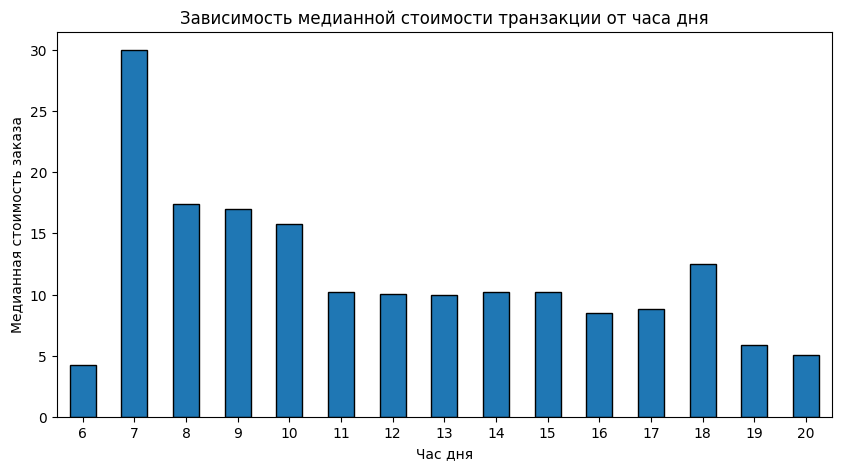

In [42]:
# график распределения количества транзакции в зависимости от часа дня
plt.figure(figsize=(10,5))
# гсруппируем по часам общую цену с медианой в значениях
data.groupby("hour")["TotalPrice"].median().plot(kind="bar",  rot=0)
plt.title("Зависимость медианной стоимости транзакции от часа дня")
plt.xlabel("Час дня")
plt.ylabel("Медианная стоимость заказа")
plt.show()

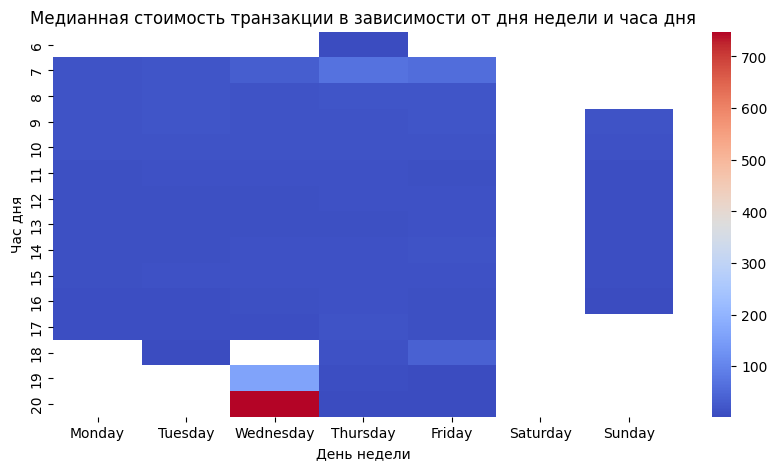

In [43]:
# создание сводной таблицы
pivot_table = pd.pivot_table(data, values="TotalPrice", index="hour",
                             columns="day_of_week", aggfunc="median")
# сортировка дней недели в сводной таблице
pivot_table = pivot_table.reindex(columns=
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# построение тепловой карты
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, cmap="coolwarm")
plt.title("Медианная стоимость транзакции в зависимости от дня недели и часа дня")
plt.xlabel("День недели")
plt.ylabel("Час дня")
plt.show()


In [44]:
# создание сводной таблицы
pivot_table = pd.pivot_table(data, values="TotalPrice",
                             index="hour", columns="day_of_week", aggfunc="median")
pivot_table = pivot_table.reindex(columns=
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
# отобразим данные в виде таблицы
pivot_table

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
6,NaN,NaN,NaN,4.25,NaN,NaN,NaN
7,15.150,18.21,33.00,67.05,59.580,NaN,NaN
8,16.500,17.70,17.00,17.70,17.400,NaN,NaN
9,16.500,17.40,17.00,17.00,17.340,NaN,16.50
10,15.900,15.60,16.50,16.80,15.000,NaN,13.20
11,10.500,13.20,11.80,12.75,10.200,NaN,7.50
12,10.400,10.50,10.20,11.90,11.700,NaN,5.95
13,10.200,10.40,10.79,10.20,11.800,NaN,6.25
14,10.200,10.20,11.90,13.28,15.000,NaN,5.85


### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [ ]:
'''# создадим датафрем для RFM-характеристик
RFM = pd.DataFrame()
# добавим новый столбец 'Recency' с последними датами заказов
RFM['Recency'] = data.groupby('CustomerID').date.max()
# вычислим количество дней между последним заказом и точкой отсчета
RFM['Recency'] = (pd.to_datetime('2011-12-10') - pd.to_datetime(RFM['Recency'])).dt.days
# добавим новый столбец 'Frequency' с количеством уникальных заказов
RFM['Frequency'] = data.groupby('CustomerID')['InvoiceNo'].nunique()
# добавим новый столбец 'Frequency' с суммой потраченной клиентом
RFM['Monetary Value'] = data.groupby('CustomerID')['TotalPrice'].sum()'''

In [45]:
now = pd.to_datetime('2011-12-10')
custom_aggregation = {
    'InvoiceDate': lambda x: (now - x.max()).days,
    'InvoiceNo': lambda x: len(x.unique()),
    'TotalPrice': lambda x: x.sum(),
}
RFM = data.groupby('CustomerID').agg(custom_aggregation)
RFM = RFM.rename(
    columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary Value'})#, 'TotalQuantity': 'MeanQuanti
RFM.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


In [46]:
RFM.Frequency.describe()

count    4334.000000
mean        4.245962
std         7.634989
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: Frequency, dtype: float64

In [47]:
RFM.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [49]:
boxes = [px.box(RFM, x=column) for column in RFM.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
# fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [50]:
# создадим границы для признаков на уровне 95-го квантиля
upper_bound1 = RFM.Frequency.quantile(0.95)
upper_bound2 = RFM['Monetary Value'].quantile(0.95)

print(upper_bound1, upper_bound2)

13.0 5659.851999999997


In [51]:
# отфильтруем данные по верхней границе (квантили уровня 0.95)
RFM2 = RFM[(RFM['Frequency'] <= upper_bound1) &
    (RFM['Monetary Value'] <= upper_bound2)]

In [52]:
RFM2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         4044 non-null   int64  
 1   Frequency       4044 non-null   int64  
 2   Monetary Value  4044 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 126.4+ KB


In [53]:
boxes = [px.box(RFM2, x=column) for column in RFM.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
# fig.write_html('plotly/boxplot_1.html')
fig.show()

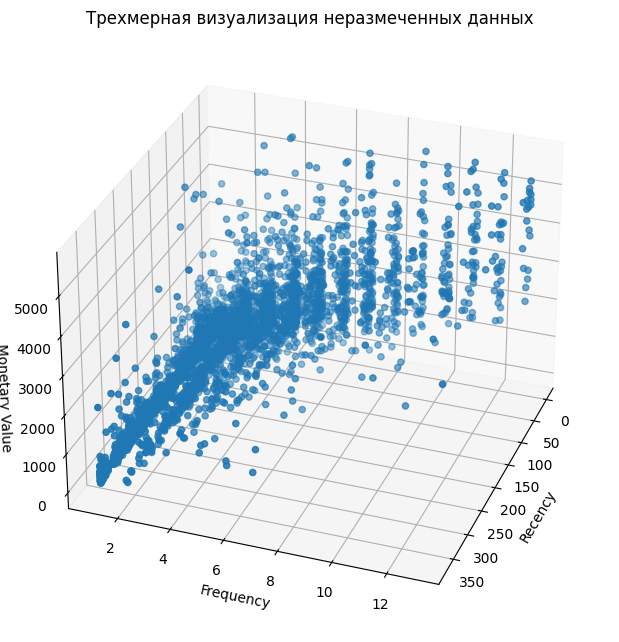

In [54]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax. elev = 30
# визуализируем данные, передав значения х, у, z, а также информацию о группировке данных по цветам
ax.scatter(
    RFM2['Recency'].to_list(),
    RFM2['Frequency'].to_list(),
    RFM2['Monetary Value'].to_list()
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('Трехмерная визуализация неразмеченных данных');

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [55]:
# стандартизируем данные
scaler = StandardScaler()
RFM2_scaled = scaler.fit_transform(RFM2)
RFM2_scaled[0]

array([ 2.24885517, -0.79167006, -0.95289122])

In [56]:
# уменьшим размерность исходных признаков до двух компонент
pca = PCA(n_components=2, random_state=42).fit(RFM2_scaled)
# преобразуем данные
RFM_pca = pca.fit_transform(RFM2_scaled)
# доля дисперсии, которая объясняет первая главная компонента
pca.explained_variance_ratio_[0]

0.6774705317186047

In [57]:
RFM_pca

array([[-2.13520066,  1.40159569],
       [ 3.44712453,  0.85287213],
       [ 0.62910337,  0.08321704],
       ...,
       [-1.42102558,  0.16834651],
       [-0.31933001, -1.19828491],
       [ 0.77186997, -0.15752725]])

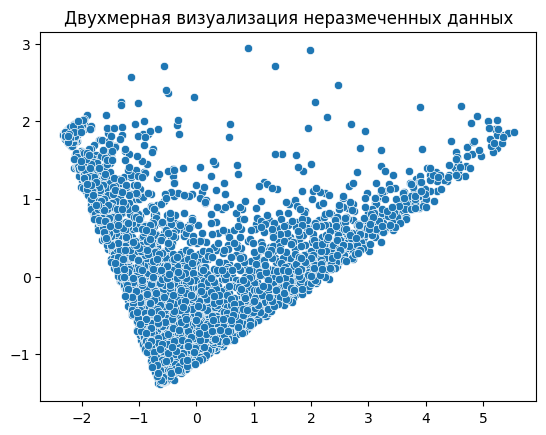

In [58]:
# создадим двумерный объект
sns.scatterplot(data=RFM_pca, x=RFM_pca[:,0], y=RFM_pca[:,1])
plt.title('Двухмерная визуализация неразмеченных данных');

In [59]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(RFM_pca)

# найдем количество кластеров с помощью алгоритмом kmeans
sil_coeffs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(RFM_pca)
    labels = kmeans.labels_
    sil_coeff = silhouette_score(RFM_pca, labels)
    sil_coeffs.append(sil_coeff)
optimal_n_clusters_sil = sil_coeffs.index(max(sil_coeffs)) + 2
optimal_n_clusters_sil

3

In [60]:
# выведем все значения коэффициент силуэта
sil_coeffs

[0.500194176043501,
 0.5241734291185512,
 0.4975527884563749,
 0.45466593746459527,
 0.44795254850193356,
 0.41964144382960106,
 0.4293729851682951,
 0.40716067544220713,
 0.39752810660615673]

In [61]:
# наибольшее значение коэффициента силуэта для KMeans 0.52
round(max(sil_coeffs),2)

0.52

In [62]:
# найдем количество кластеров с помощью GaussianMixture
for n_components in range(2,11):
    gmm = GaussianMixture(n_components=n_components,random_state=42)
    gmm.fit(RFM_pca)
    # Получим коэффициент силуэта для каждой группы
    labels = gmm.predict(RFM_pca)
    silhouette = silhouette_score(RFM_pca, labels, metric='euclidean')
    print("Количество n_components =",
        n_components," имеет коэффициент силуэта", round(silhouette,2))
# Количество n_components = 3  имеет коэффициент силуэта 0.44

Количество n_components = 2  имеет коэффициент силуэта 0.34
Количество n_components = 3  имеет коэффициент силуэта 0.44
Количество n_components = 4  имеет коэффициент силуэта 0.35
Количество n_components = 5  имеет коэффициент силуэта 0.28
Количество n_components = 6  имеет коэффициент силуэта 0.27
Количество n_components = 7  имеет коэффициент силуэта 0.24
Количество n_components = 8  имеет коэффициент силуэта 0.2
Количество n_components = 9  имеет коэффициент силуэта 0.16
Количество n_components = 10  имеет коэффициент силуэта 0.15


In [63]:
# создадим пустой список для значний сиуэта
siliuette_list_hierarchical = []

# создадим цикл для поиска кластеров алгоритмом AgglomerativeClustering
for cluster in range(2,11):
    agglomerative = AgglomerativeClustering(affinity='euclidean',
                                            n_clusters=cluster).fit_predict(RFM_pca)
    sil_score = silhouette_score(RFM_pca, agglomerative, metric='euclidean')
    siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative))))

# создадим датафрейм для значний сиуэта
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical,
                               columns=['cluster', 'sil_score','number_of_clusters'])
df_hierarchical.sort_values(by = 'sil_score', ascending= False)

,cluster,sil_score,number_of_clusters
0,2,0.523371,2
1,3,0.496759,3
3,5,0.439062,5
2,4,0.425310,4
4,6,0.421116,6
5,7,0.412763,7
6,8,0.363473,8
7,9,0.350987,9
8,10,0.324734,10


In [64]:
# обучим лучшую модель KMeans с 3мя кластерами
kmeans = KMeans(n_clusters=3, random_state=42).fit(RFM_pca)
# добавим метки кластеров в датафрейм
RFM2['K-Means_Cluster_ID'] = kmeans.labels_

In [65]:
RFM_pca

array([[-2.13520066,  1.40159569],
       [ 3.44712453,  0.85287213],
       [ 0.62910337,  0.08321704],
       ...,
       [-1.42102558,  0.16834651],
       [-0.31933001, -1.19828491],
       [ 0.77186997, -0.15752725]])

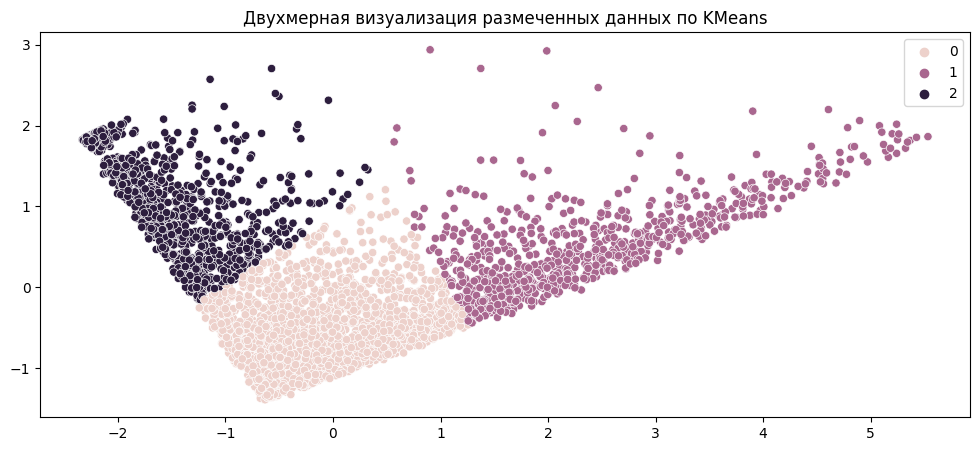

In [66]:
# визуализируем график с кластерами
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=RFM2,x= RFM_pca[:,0],
    y=RFM_pca[:,1],
    hue=kmeans.labels_
)
plt.title('Двухмерная визуализация размеченных данных по KMeans');

In [67]:
RFM2.head()

,Recency,Frequency,Monetary Value,K-Means_Cluster_ID
CustomerID,,,,
12346,325,1,0.00,2
12347,2,7,4310.00,1
12348,75,4,1437.24,0
12349,18,1,1457.55,0
12350,310,1,294.40,2


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

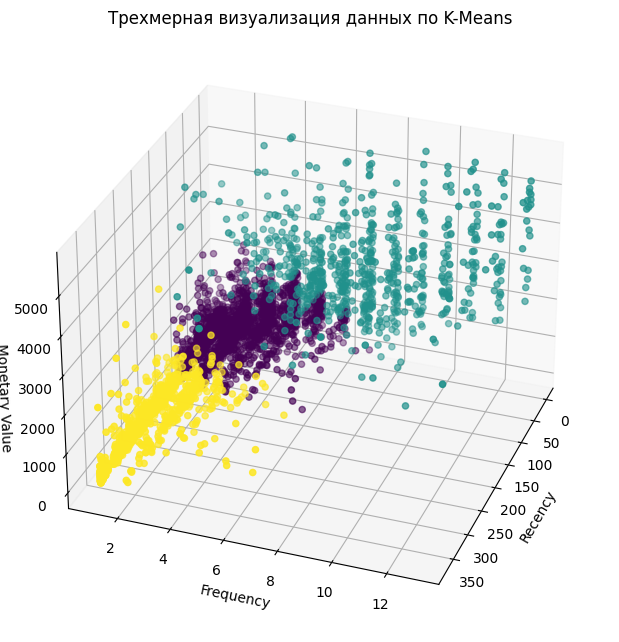

In [68]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30
# визуализируем данные, передав значения х, у, z, а также информацию о группировке данных по цветам
ax.scatter(
    RFM2['Recency'].to_list(),
    RFM2['Frequency'].to_list(),
    RFM2['Monetary Value'].to_list(),
    c = RFM2['K-Means_Cluster_ID']
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('Трехмерная визуализация данных по K-Means');

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [69]:
# сгруппируем RFM-таблицу, рассчитав среднее по каждому из признаков
cluster_grouped = RFM2.groupby(['K-Means_Cluster_ID']).mean()
display(cluster_grouped.style.background_gradient(cmap='coolwarm'))

,Recency,Frequency,Monetary Value
K-Means_Cluster_ID,,,
0,51.127481,2.329069,660.168677
1,31.943299,7.068299,2657.746997
2,253.283716,1.405594,386.598472


In [72]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=400, # ширина (в пикселях)
        height=400, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [73]:
# построим визуализации профиля кластеров в виде полярной диаграммы
data_profile = plot_cluster_profile(cluster_grouped,3)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

По RF-сегментации:

* K-Means_Cluster_ID = 2 соотвествует "в зоне риска" клиентам, которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад;
* K-Means_Cluster_ID = 1 соотвествует "лояльным" клиентам, которые приносят наибольший доход, совершает покупки чаще всего, а давность их последней покупки наименьшая;
* K-Means_Cluster_ID = 0 соотвествует "перспективным" клиентам, которые являются активными покупателями, но покупают не так часто как "лояльные" клиенты.